In [1]:
import pandas as pd


In [3]:
hj=pd.read_csv('D:/python_file/revlauation_rates_2012 _onwards.csv')

In [4]:
hj.columns

Index(['year', 'month', 'month_year', 'dates', 'currency', 'Ready', 'week',
       '2 week', '1m', '2m', '3m', '4m ', '5m', '6m', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [7]:
columns_to_drop=['week',
       '2 week', '1m', '2m', '3m', '4m ', '5m', '6m', 'Unnamed: 14',
       'Unnamed: 15']

In [8]:
hj.drop(columns=columns_to_drop, inplace=True)

In [9]:
hj.columns

Index(['year', 'month', 'month_year', 'dates', 'currency', 'Ready'], dtype='object')

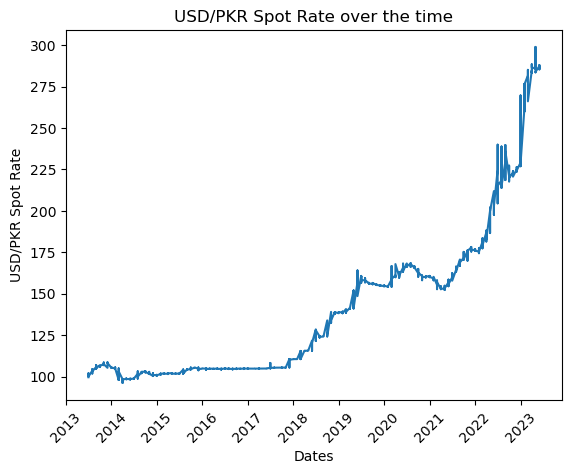

In [35]:
import matplotlib.pyplot as plt

hj['dates'] = pd.to_datetime(hj['dates'])

# Sort the DataFrame by 'dates' (if not already sorted)
hj.sort_values(by='dates', inplace=True)

# Create a line plot
plt.plot(hj['dates'], hj['Ready'])
plt.xlabel('Dates')
plt.ylabel('USD/PKR Spot Rate')
plt.title('USD/PKR Spot Rate over the time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.show()

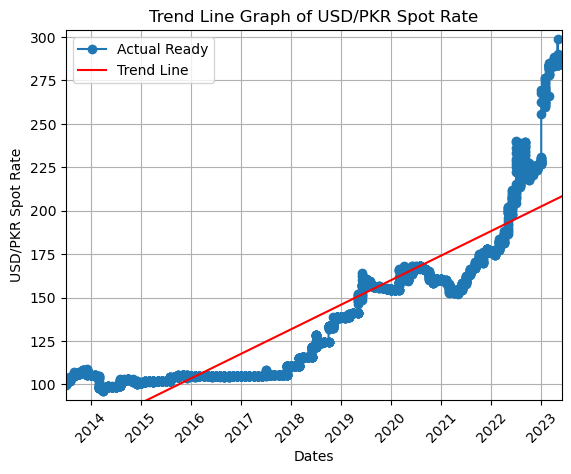

In [34]:
import numpy as np
from scipy.stats import linregress


hj['dates'] = pd.to_datetime(hj['dates'])

# Create x values as the number of days since the first date in the data
x_values = (hj['dates'] - hj['dates'].min()).dt.days

# Calculate the linear regression line parameters
slope, intercept, _, _, _ = linregress(x_values, hj['Ready'])

# Calculate the predicted y values using the regression line
predicted_ready = intercept + slope * x_values

# Plot the data and the trend line
plt.plot(hj['dates'], hj['Ready'], marker='o', label='Actual Ready')
plt.plot(hj['dates'], predicted_ready, label='Trend Line', color='red')

# Stretching the x-axis by specifying custom x-axis limits
plt.xlim(hj['dates'].min(), hj['dates'].max())

# Stretching the y-axis by specifying custom y-axis limits
plt.ylim(hj['Ready'].min() - 5, hj['Ready'].max() + 5)


plt.xlabel('Dates')
plt.ylabel('USD/PKR Spot Rate')
plt.title('Trend Line Graph of USD/PKR Spot Rate')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()




In [20]:
hj.columns

Index(['year', 'month', 'month_year', 'dates', 'currency', 'Ready',
       '_month_year'],
      dtype='object')

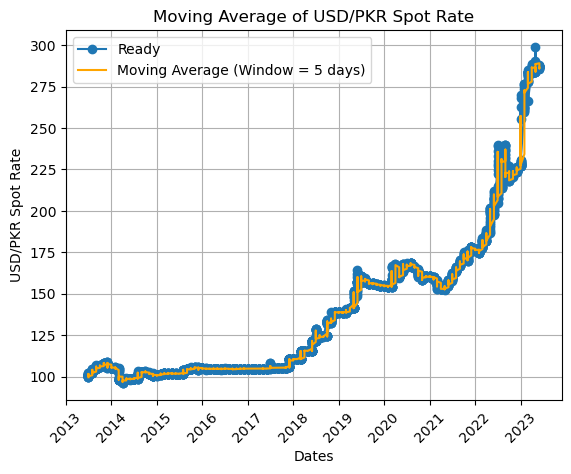

In [40]:
hj['dates'] = pd.to_datetime(hj['dates'])

# Calculate the moving average of 'Ready' using a specified window (e.g., 3 days)
window = 5
hj['Moving_Average'] = hj['Ready'].rolling(window=window, min_periods=1).mean()

# Plot the 'Ready' values and the moving average
plt.plot(hj['dates'], hj['Ready'], marker='o', label='Ready')
plt.plot(hj['dates'], hj['Moving_Average'], label=f'Moving Average (Window = {window} days)', color='orange')

plt.xlabel('Dates')
plt.ylabel('USD/PKR Spot Rate')
plt.title('Moving Average of USD/PKR Spot Rate')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [54]:
hj.columns

Index(['year', 'month', 'month_year', 'dates', 'currency', 'Ready',
       '_month_year', 'Moving_Average'],
      dtype='object')

In [56]:


hj.describe()

,year,month,Ready,Moving_Average
count,2703.000000,2703.000000,2703.000000,2703.000000
mean,2017.960044,6.514983,137.684705,137.546905
std,2.781966,3.474936,44.810423,44.599871
min,2013.000000,1.000000,96.206600,96.877520
25%,2016.000000,3.000000,104.844300,104.833780
50%,2018.000000,7.000000,115.500400,115.476700
75%,2020.000000,10.000000,160.102650,160.168910
max,2023.000000,12.000000,298.931800,289.091320


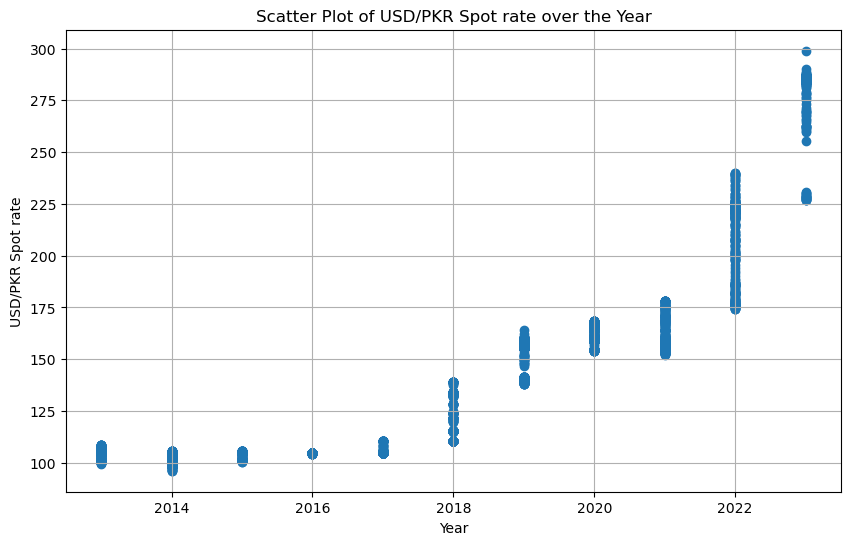

In [58]:
year_values = hj['year']

# Draw the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(year_values, hj['Ready'], marker='o')
plt.xlabel('Year')
plt.ylabel('USD/PKR Spot rate')
plt.title('Scatter Plot of USD/PKR Spot rate over the Year')
plt.grid(True)

plt.show()

In [63]:
bins = range(1980, 2021, 20)

# Group the data by the 'year' bins and calculate the mean of 'Ready' for each bin
average_rates_by_duration = hj.groupby(pd.cut(hj['year'], bins=bins))['Ready'].mean()

print(average_rates_by_duration)

year
(1980, 2000]           NaN
(2000, 2020]    118.888776
Name: Ready, dtype: float64


In [69]:
import pandas as pd
hja = pd.read_html('file:///C:/Users/Lenovo/Downloads/usd_pkr_trend%20(1).html')[0]

# Save it as an Excel file
hja.to_excel('usd_pkr_trend.xlsx', index=False)

In [70]:
import pandas as pd
import openpyxl

In [75]:
import pandas as pd
from bs4 import BeautifulSoup
import base64

# Read the HTML file
with open("C:/Users/Lenovo/Downloads/usd_pkr_trend.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all the img tags containing the graphs
graphs = soup.find_all("img")

# Create a Pandas DataFrame to store the graphs
df = pd.DataFrame(columns=["Graph"])

# Iterate through the graphs and add them to the DataFrame
for idx, graph in enumerate(graphs):
    graph_base64 = graph["src"].split(",")[-1]
    graph_bytes = base64.b64decode(graph_base64)
    df.loc[idx] = [graph_bytes]

# Save the DataFrame to an Excel file
df.to_excel("usd_pkr_trend_with_graphs.xlsx", engine="openpyxl", index=False)


